In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
DATA_DIR = '..\\data\\raw'
INTERIM_DIR = '..\\data\\interim'
FINAL_DIR = '..\\data\\final'

In [5]:
movies_df = pd.read_csv(os.path.join(FINAL_DIR, 'movies.csv'))
movies_df

,Unnamed: 0,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,1,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,70,"Action,Adventure,Biography",6.1,...,0,0,0,0,0,0,0,0,0,0
1,2,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,90,Drama,4.6,...,0,0,0,0,0,0,0,0,0,0
2,3,tt0000615,movie,Robbery Under Arms,Robbery Under Arms,0,1907,94,Drama,4.5,...,0,0,0,0,0,0,0,0,0,0
3,4,tt0000630,movie,Hamlet,Amleto,0,1908,94,Drama,3.8,...,0,0,0,0,0,0,0,0,0,0
4,5,tt0000675,movie,Don Quijote,Don Quijote,0,1908,94,Drama,4.9,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264914,275171,tt9916190,movie,Safeguard,Safeguard,0,2020,90,"Action,Adventure,Thriller",3.6,...,0,0,0,0,0,0,0,1,0,0
264915,275172,tt9916270,movie,Il talento del calabrone,Il talento del calabrone,0,2020,84,Thriller,5.8,...,0,0,0,0,0,0,0,1,0,0
264916,275173,tt9916362,movie,Coven,Akelarre,0,2020,92,"Drama,History",6.4,...,0,0,0,0,0,0,0,0,0,0
264917,275174,tt9916428,movie,The Secret of China,Hong xing zhao yao Zhong guo,0,2019,94,"Adventure,History,War",3.8,...,0,0,0,0,0,0,0,0,1,0


In [6]:
movies_df.columns

Index(['Unnamed: 0', 'tconst', 'titleType', 'primaryTitle', 'originalTitle',
       'isAdult', 'startYear', 'runtimeMinutes', 'genres', 'averageRating',
       'numVotes', 'pi_mean_mean', 'pi_mean_std', 'pi_med_mean', 'pi_med_std',
       'pi_std_mean', 'pi_std_std', 'Action', 'Adult', 'Adventure',
       'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'Film-Noir', 'Game-Show', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance',
       'Sci-Fi', 'Short', 'Sport', 'Talk-Show', 'Thriller', 'War', 'Western'],
      dtype='object')

In [7]:
movies_df['pi_mean_mean'].describe()

count    264919.000000
mean          6.400707
std           0.857045
min           0.000000
25%           6.028333
50%           6.525000
75%           6.905000
max          10.000000
Name: pi_mean_mean, dtype: float64

In [8]:
movies_df['pi_med_mean'].describe()

count    264919.000000
mean          6.432778
std           0.870789
min           0.000000
25%           6.055000
50%           6.565000
75%           6.950000
max          10.000000
Name: pi_med_mean, dtype: float64

In [9]:
movies_df['numVotes'].describe()

count    2.649190e+05
mean     3.601800e+03
std      3.419407e+04
min      5.000000e+00
25%      1.900000e+01
50%      6.300000e+01
75%      3.180000e+02
max      2.548006e+06
Name: numVotes, dtype: float64

In [10]:
movies_df.sort_values(by='pi_mean_mean', ascending=False).head(10)

,Unnamed: 0,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
157560,165884,tt12980094,movie,Days of Géants II,Days of Géants II,0,2020,80,Documentary,10.0,...,0,0,0,0,0,0,0,0,0,0
260071,270264,tt8933716,movie,Wedding 93,Wedding 93,0,2021,71,"Documentary,Horror",10.0,...,0,0,0,0,0,0,0,0,0,0
174364,183286,tt15940394,movie,Rokto Folok,Rokto Folok,0,2021,94,Mystery,9.9,...,0,0,0,0,0,0,0,0,0,0
161816,170248,tt13563118,movie,Sarasate: The Spanish Spirit,Sarasate: The Spanish Spirit,0,2020,53,Documentary,9.9,...,0,0,0,0,0,0,0,0,0,0
177272,186249,tt16747572,movie,The Silence of Swastika,The Silence of Swastika,0,2021,56,"Documentary,History",9.9,...,0,0,0,0,0,0,0,0,0,0
175731,184685,tt16312196,movie,Maa Kathalu,Maa Kathalu,0,2021,94,Drama,9.8,...,0,0,0,0,0,0,0,0,0,0
222550,232218,tt4339104,movie,A Lifetime Poem,A Lifetime Poem,0,2015,94,"Biography,Documentary,Drama",9.8,...,0,0,0,0,0,0,0,0,0,0
180507,189526,tt1765914,movie,Mia Palia Fotografia,Mia Palia Fotografia,0,2005,126,"Biography,Documentary",9.3,...,0,0,0,0,0,0,0,0,0,0
171770,180635,tt15405402,movie,"The Bird (Or: Marty, Clown)","The Bird (Or: Marty, Clown)",0,2021,61,Documentary,9.7,...,0,0,0,0,0,0,0,0,0,0
258284,268464,tt8628638,movie,Song of Songs: The Journey of a Consecrated Vi...,Song of Songs: The Journey of a Consecrated Vi...,0,2020,45,Documentary,9.7,...,0,0,0,0,0,0,0,0,0,0


###  Assessing the effectiveness of the Popluarity Index for Movies

<AxesSubplot:xlabel='pi_mean_mean', ylabel='averageRating'>

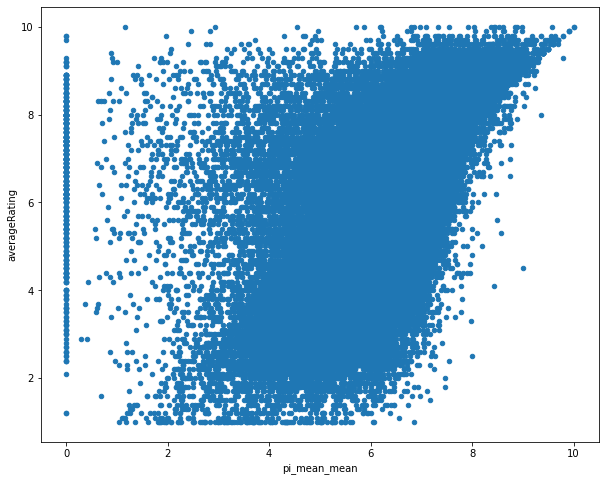

In [11]:
movies_df.plot.scatter('pi_mean_mean', 'averageRating', figsize=(10,8))

<AxesSubplot:xlabel='pi_med_mean', ylabel='averageRating'>

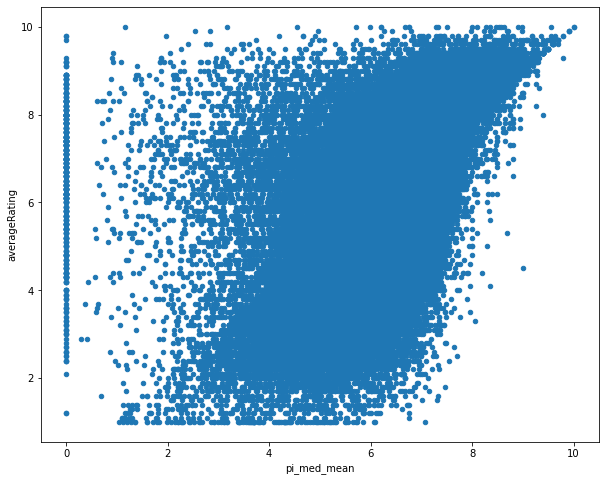

In [12]:
movies_df.plot.scatter('pi_med_mean', 'averageRating', figsize=(10,8))

####  As we observe the graph, there seems to be a positive correlation between the popularity index (mean and median) and rating. However, it seems to be a weak correlation 

In [13]:
pop_ind_columns = [col for col in movies_df.columns if 'pi_' in col]
pop_ind_columns

['pi_mean_mean',
 'pi_mean_std',
 'pi_med_mean',
 'pi_med_std',
 'pi_std_mean',
 'pi_std_std']

<AxesSubplot:>

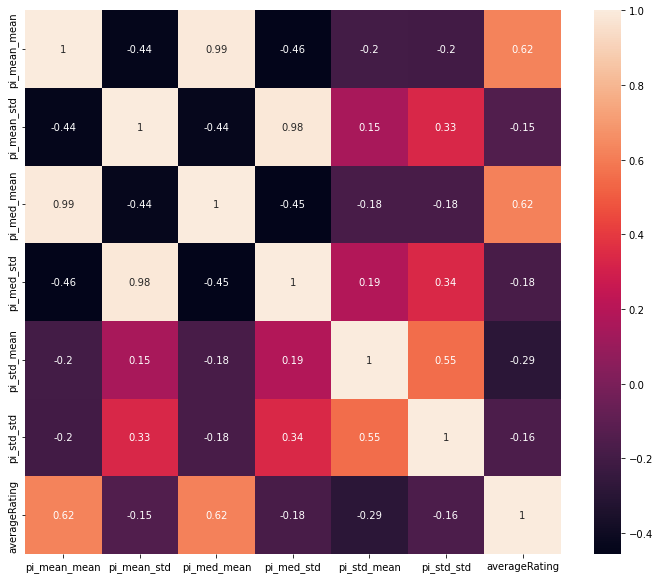

In [26]:
pop_ind_corr = movies_df[pop_ind_columns+['averageRating']]

plt.figure(figsize=(12,10))
sns.heatmap(pop_ind_corr.corr(), 
            xticklabels=pop_ind_corr.columns,
            yticklabels=pop_ind_corr.columns,
            annot=True)

### Distribution of Person Popularity Index

In [16]:
names_df = pd.read_csv(os.path.join(FINAL_DIR, 'names.basics.csv'))
names_df.columns

Index(['Unnamed: 0', 'nconst', 'primaryName', 'birthYear', 'deathYear',
       'primaryProfession', 'knownForTitles', 'pop_ind_mean', 'pop_ind_median',
       'pop_ind_std'],
      dtype='object')

array([[<AxesSubplot:title={'center':'pop_ind_mean'}>]], dtype=object)

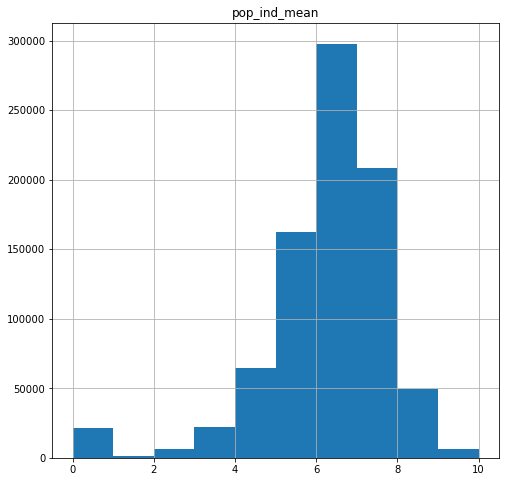

In [17]:
names_df.hist(column='pop_ind_mean', bins=10, figsize=(8,8))

array([[<AxesSubplot:title={'center':'pop_ind_std'}>]], dtype=object)

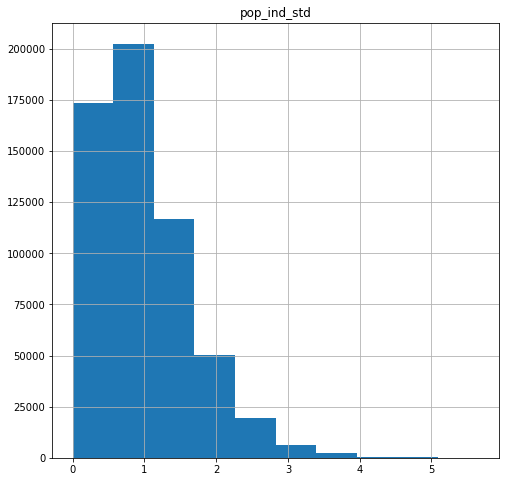

In [18]:
names_df.hist(column='pop_ind_std', bins=10, figsize=(8,8))

#### Majority of the people have a popularity index of around 6 and  the standard deviation for the majority of people is low

#### The standard deviation could be low for two reasons:
 - The people are consistent in their performance
 - There is only a single value of rating available from the entire crew.

### Listing out highly popular people according to popularity index

In [19]:
names_df[names_df['pop_ind_mean']>8]

,Unnamed: 0,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,pop_ind_mean,pop_ind_median,pop_ind_std
4,4,nm0000005,Ingmar Bergman,1918.0,2007.0,"writer,director,actor","tt0069467,tt0060827,tt0083922,tt0050986",8.125,8.10,0.050000
6,6,nm0000007,Humphrey Bogart,1899.0,1957.0,"actor,soundtrack,producer","tt0037382,tt0043265,tt0033870,tt0034583",8.025,7.90,0.330404
7,7,nm0000008,Marlon Brando,1924.0,2004.0,"actor,soundtrack,director","tt0047296,tt0078788,tt0068646,tt0070849",8.175,8.25,0.910586
19,19,nm0000020,Henry Fonda,1905.0,1982.0,"actor,producer,soundtrack","tt0082846,tt0051207,tt0050083,tt0032551",8.025,7.85,0.713559
32,32,nm0000033,Alfred Hitchcock,1899.0,1980.0,"director,producer,actor","tt0053125,tt0056869,tt0054215,tt0052357",8.200,8.30,0.346410
...,...,...,...,...,...,...,...,...,...,...
851156,851156,nm9990147,Dash,NaN,NaN,NaN,tt10556292,8.600,8.60,NaN
851166,851166,nm9990495,Patrick Quiroz,NaN,NaN,actor,"tt16175706,tt12132812,tt9266114,tt11247108",8.700,8.70,0.658281
851200,851200,nm9992036,Eric Camargo,NaN,NaN,"composer,miscellaneous","tt8800338,tt8740330",8.350,8.35,1.767767
851220,851220,nm9992852,Dahl Lee,NaN,NaN,director,tt8757056,8.300,8.30,NaN


#### We can see towards the end of the table, many people having NaN as std deviation and same values of mean and median which suggests the occurence of the second possibility we mentioned above. We can analyze and account for that factor later.

### Distribution of movie popularity index

array([[<AxesSubplot:title={'center':'pi_mean_mean'}>]], dtype=object)

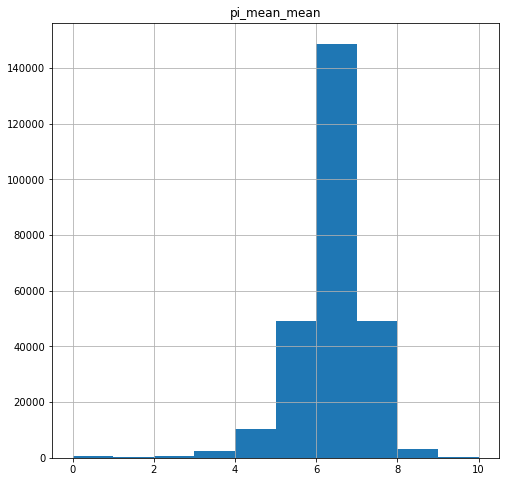

In [20]:
movies_df.hist(column='pi_mean_mean', bins=10, figsize=(8,8))

<AxesSubplot:xlabel='numVotes', ylabel='averageRating'>

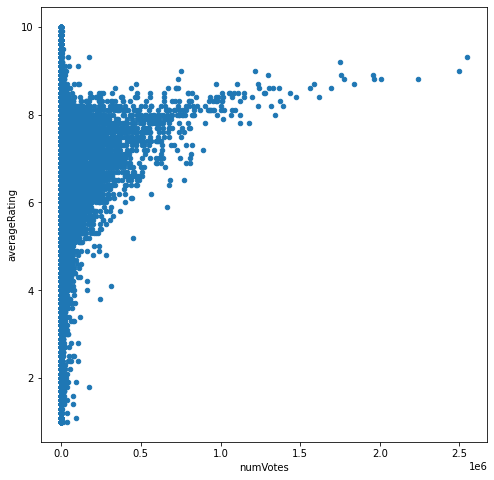

In [21]:
movies_df.plot.scatter('numVotes', 'averageRating', figsize=(8,8))

#### We can see that the titles having a large number of votes are generally highly rated. Lets explore some of them below:

In [22]:
high_num_votes = movies_df[movies_df['numVotes']>200000]
high_num_votes

,Unnamed: 0,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
7955,8271,tt0027977,movie,Modern Times,Modern Times,0,1936,87,"Comedy,Drama,Romance",8.5,...,0,0,1,0,0,0,0,0,0,0
10118,10478,tt0031381,movie,Gone with the Wind,Gone with the Wind,0,1939,238,"Drama,History,Romance",8.1,...,0,0,1,0,0,0,0,0,0,0
10613,10986,tt0032138,movie,The Wizard of Oz,The Wizard of Oz,0,1939,102,"Adventure,Family,Fantasy",8.0,...,0,0,0,0,0,0,0,0,0,0
10883,11263,tt0032553,movie,The Great Dictator,The Great Dictator,0,1940,125,"Comedy,Drama,War",8.4,...,0,0,0,0,0,0,0,0,1,0
11478,11876,tt0033467,movie,Citizen Kane,Citizen Kane,0,1941,119,"Drama,Mystery",8.3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259132,269319,tt8772262,movie,Midsommar,Midsommar,0,2019,148,"Drama,Horror,Mystery",7.1,...,0,0,0,0,0,0,0,0,0,0
260141,270334,tt8946378,movie,Knives Out,Knives Out,0,2019,130,"Comedy,Crime,Drama",7.9,...,0,0,0,0,0,0,0,0,0,0
260696,270893,tt9032400,movie,Eternals,Eternals,0,2021,156,"Action,Adventure,Fantasy",6.4,...,0,0,0,0,0,0,0,0,0,0
261901,272113,tt9243946,movie,El Camino: A Breaking Bad Movie,El Camino: A Breaking Bad Movie,0,2019,122,"Action,Crime,Drama",7.3,...,0,0,0,0,0,0,0,0,0,0


#### We can see some real classics in the list above. But oddly their ratings are relatively low (not towards 9-10). Therefore we need to find a way to incorporate the numVotes feature in popularity index so that it represents these highly popular movies correctly. Lets correlate the popularity index with ratings for these movies with high numVotes

<AxesSubplot:>

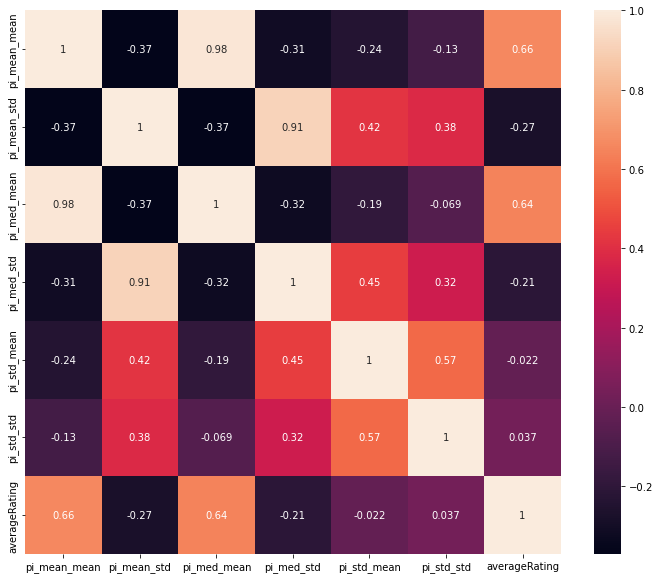

In [25]:
high_num_votes_corr = high_num_votes[pop_ind_columns+['averageRating']]

plt.figure(figsize=(12,10))
sns.heatmap(high_num_votes_corr.corr(), 
            xticklabels=pop_ind_corr.columns,
            yticklabels=pop_ind_corr.columns,
            annot=True)

#### The correlation between ratings and popularity index is slightly higher for these movies. That is one more reason to explore ways to incorporate numVotes into popularity Index.